<img src = "https://s3-us-west-2.amazonaws.com/courses-images-archive-read-only/wp-content/uploads/sites/222/2014/12/20104824/Figure_16_01_02b.jpg" alt = "Encabezado MLDS2 Protecto Final" width = "90%" height = "200">  </img>

# **_SUBENFRIAMIENTO EN SISTEMAS DE REFRIGERACIÓN_**
____

<img src = "https://www.bitzer.de/shared_media/html/est-610/Images/jpg/18014398729259403__Web.jpg" alt = "Figura 1" width = "30%%" height = "30%" style="display: block; margin: 0 auto">  </img>
<p style="text-align: center;">Figura 1: Circuito de subenfriamiento de líquido</p>

<div style="text-align: justify">

Los sistemas de refrigeración comercial constantemente tienen actualizaciones en sus circuitos y/o elementos buscando   
mejorar su eficiencia energética; uno de las propuestas más comunes es el subenfriamiento de líquido refrigerante con   
el fin de aumentar la capacidad de evaporadores, los diseñadores han propuesto varios circuitos y uno de ellos es el   
presentado en la figura 1, consiste en un intercambiador de calor que toma parte del líquido que sale del condensador    
y lo expande para así refrigerar el líquido restante, este refrigerante expandido cambia de fase a gas y es nuevamente   
succionado por el compresor.  

</div>


## 1.ENTENDIMIENTO DEL NEGOCIO ##
---
### _1.A OBJETIVOS DEL NEGOCIO:_ ###

1. Predecir el ahorro en consumo energético de un sistema de refrigeración comercial entre un sistema que cuenta  
    con subenfriador de líquido y uno que no.

2. Seleccionar el tipo de sistema adecuado para la ciudad y condiciones de operación del lugar de estudio, en   
   este caso un área comercial de la ciudad de Cúcuta.  



### _1.B METAS DEL PROYECTO DE ML:_ ###

<div style="text-align: justify">

1. Implementar varios modelos de aprendizaje de máquina supervisados con el fin de conocer despues del tiempo **$t_{1}$**  
   de cuánto sería el consumo de energía del sistema para unas condiciones iniciales con subenfriamiento activado.

2. Encontrar los hiperparámetros que generan el mejor comportamiento de cada uno de los modelos aplicados.

2. Seleccionar el modelo que mejor predice el comportamiento de los consumos de energía y sustentarlo a través de 
   alguna métrica.

<div/>

## 2. ENTENDIMIENTO DE LOS DATOS: ##
---
### _2.A RECOLECCIÓN DE LOS DATOS_ ###

<div style="text-align: justify">
Se importan las librerias que se usarán en la primera sección del proyecto, los datos se obtienen del supervisor
del sistema de refrigeración del lugar a verificar, este supervisor cuenta con históricos de más de 500 variables
de control, tanto del controlador central, como de controladores remotos y el medidor de energía del sistema, el
cual registra la potencia consumida cada minuto. 

<div/>

<img src = "https://assets.danfoss.com/photos/preview/197106/ID107323828811-0201_preview.jpg?w=300&h=300" alt = "Figura 1" width = "25%" height = "25%" style="display: block; margin: 0 auto">  </img>
<p style="text-align: center;">Figura 2: Sistema de supervisión y control</p>

<div style="text-align: justify">

Todos los controladores se conectan al supervisor vía modbus o LON y finalmente, este supervisor permite monitorear
remotamente los datos desde cualquier pc, ya que cuenta con web-server y procolo TCP/IP; para la obtención de los datos
se validaron las credenciales de ingreso, se seleccionaron las variables a descargar, el periodo temporal de revisión y
el periodo de muestreo, estos fueron recibidos desde el cotrol en formato _**.txt**_

<div/>

In [1]:
import sklearn
from sklearn.datasets import *
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


### _2.B DESCRIPCIÓN DE LOS DATOS_ ###

<div style="text-align: justify">

Se comprueba que el dataset tiene el tamaño esperado y se han leído las variables con el tipo esperado, a continuación
la descripción y justificación de cada una de las características seleccionadas:

-_**Time:**_ Fecha y hora en la que se toma el dato, este tipo de sistemas tienen una configuración que relaja los paramétros 
de control durante la noche.
     
-_**TempExterior:**_ Temperatura ambiente, de gran importancia pues uno de los elementos más importantes del sistema es un
intercambiador de calor de fluido refrigerante con aire ambiente, bajas temperaturas ambiente mejoran la transferencia y mejoran la
eficiencia del sistema.
      
-_**Pres.Aspirac AB:**_ Presión a la que succionan los compresores del área de congelación, la presión de succión debe ser alta
ya que así se logra la mejor eficiencia desde el pto. de vista termodinámico, sin embargo, valores muy altos limitan la transferencia
de calor a los evaporadores y aumentan el consumo eléctrico de compresores.

-_**Pres.Aspirac AM:**_ Presión a la que succionan los compresores del área de refrigeración, la presión de succión debe ser alta
ya que así se logra la mejor eficiencia desde el pto. de vista termodinámico, sin embargo, valores muy altos limitan la transferencia
de calor a los evaporadores y aumentan el consumo eléctrico de compresores.  
  
-_**Pres Descarga A:**_ Presión a la que descargan los compresores, siempre se desean valores bajos pero están restringidos por la 
temperatura ambiente y las presiones de succión, su aumento impacta directamente en el consumo de energía.  
  
-_**Sensor Intercam:**_ Sensor de temperatura a la salida del intercambiador de subcooling, tener un buen subcooling disminuye el consumo,
sin embargo, en este caso se usa parte de la capacidad de los compresores de refrigeración para lograrlo, encontrar el subcooling
adecuado es una tarea que requiere experimentación y en algunos casos el punto óptimo podría ser incluso la anulación por completo
del intercambiador.  
  
-_**Capacidad Asp. AB:**_ Porcentaje de compresores prendidos para el área de congelación.  
  
-_**Capacidad Asp. AM:**_ Porcentaje de compresores prendidos para el área de refrigeración.  
  
-_**Medidor 1  Pot. Total:**_ Potencia instántanea leída por el medidor de energía, esta sería la etiqueda del conjunto de datos.  
  
-_**Medidor 1  Consumo:**_ Consumo de referencia para válidar que la medida de potencia instántanea tiene sentido.


</div>

In [2]:
df = pd.read_csv("~/Downloads/M_Cucuta_ML2.txt", delimiter = ',')
#print(df.head)
#print(df.iloc[0:10,:])
print(df.shape)
df.dtypes


(48039, 43)


Time                           object
TempExterior (SI)             float64
Pres.Aspirac AB (SI)          float64
Pres.Aspirac AM (SI)          float64
Pres Descarga A (SI)          float64
Sensor Intercam (SI)          float64
Capacidad Asp. AB (NA)        float64
Capacidad Asp. AM (NA)        float64
Medidor 1  Consumo (EM)       float64
Medidor 1  Pot. Total (EM)    float64
VALV GAS CAL (RO)             float64
Compressor AB1 (RO)           float64
Compressor AB2 (RO)           float64
Compressor AB3 (RO)           float64
Compressor AM1 (RO)           float64
Compressor AM2 (RO)           float64
Compressor AM3 (RO)           float64
UVER u23 AKV OD % (GN)        float64
UVER u23 AKV OD % (GN).1      float64
TEOS u23 AKV OD % (GN)        float64
FRI  u23 AKV OD % (GN)        float64
ESOS u23 AKV OD % (GN)        float64
AS A u23 AKV OD % (GN)        float64
AM6  u23 AKV OD % (GN)        float64
AM1  AKV Opening C % (GN)     float64
AM1  AKV Opening B % (GN)     float64
AM1  AKV Ope

### _2.C EXPLORACIÓN DE LOS DATOS_ ###

1. Se toma una muestra de los datos para comprobar que sean correctos, se encuentran las temperaturas en unidades
   Farenheit, se pasan a unidades Celsius para una mejor comprensión de los datos.  

In [352]:
print(df.sample(5))

                      Time  TempExterior (SI)  Pres.Aspirac AB (SI)  \
36405  05/14/2023 15:23:00               95.1                  13.2   
29870  05/10/2023 02:28:00               81.5                   9.4   
11136  04/27/2023 02:14:00               81.2                   9.2   
16439  04/30/2023 18:37:00               89.4                  16.1   
39497  05/16/2023 18:55:00               82.6                  10.5   

       Pres.Aspirac AM (SI)  Pres Descarga A (SI)  Sensor Intercam (SI)  \
36405                  39.8                 205.8                 102.5   
29870                  41.4                 184.3                  91.2   
11136                  46.0                 183.4                  91.5   
16439                  44.1                 202.6                  97.9   
39497                  44.1                 196.1                  96.2   

       Capacidad Asp. AB (NA)  Capacidad Asp. AM (NA)  \
36405                    37.5                    35.9   
29870   

### _2.D VERIFICACIÓN DE LA CALIDAD DE LOS DATOS_ ###

2. Se obtienen los principales valores estadísticos del conjunto de datos, allí ya se encuentran valores anormales como: temperaturas ambiente de $0^\circ F$, presiones de descarga de $0 psi$ y temperatura de sensor de intercambiador en $0^\circ F$, sin embargo, los valores de las medias son consecuentes con el lugar de instalación, por lo cual se presume que son solo algunos datos erróneos atípicos.

In [353]:
print(df.describe())

       TempExterior (SI)  Pres.Aspirac AB (SI)  Pres.Aspirac AM (SI)  \
count       48039.000000          48039.000000          48039.000000   
mean           84.826414             13.026972             41.930987   
std            13.056779              5.785637              8.939986   
min             0.000000             -1.000000            -12.000000   
25%            81.800000             10.100000             40.300000   
50%            85.800000             11.900000             42.500000   
75%            90.300000             14.500000             44.900000   
max           102.600000            105.000000            113.500000   

       Pres Descarga A (SI)  Sensor Intercam (SI)  Capacidad Asp. AB (NA)  \
count          48039.000000          48039.000000            48039.000000   
mean             188.947093             93.817634               42.816135   
std               38.075831             14.724928               21.090990   
min               -0.600000              0.

## 3. PREPARACIÓN DE LOS DATOS ##

### _3.A SELECCIÓN DE DATOS FINALES_ ###

3. Se genera la función para cambio de la unidad de temperatura y se comprueba en una muestra de los datos.

In [354]:
def FtoC(temp_F):
    temp_C = (temp_F - 32) * 5/9
    return temp_C       


In [355]:
df['TempExterior (SI)'] = df['TempExterior (SI)'].apply(FtoC)
df['Sensor Intercam (SI)'] = df['Sensor Intercam (SI)'].apply(FtoC)
#print(df.describe())
print(df.sample(5))

                      Time  TempExterior (SI)  Pres.Aspirac AB (SI)  \
47609  05/22/2023 10:07:00          27.222222                   7.4   
34937  05/13/2023 14:55:00          37.166667                  12.1   
42002  05/18/2023 12:40:00          34.111111                  14.8   
16044  04/30/2023 12:02:00          36.444444                  10.0   
12346  04/27/2023 22:24:00          27.944444                   5.7   

       Pres.Aspirac AM (SI)  Pres Descarga A (SI)  Sensor Intercam (SI)  \
47609                  39.8                 184.3             33.666667   
34937                  41.2                 248.8             44.111111   
42002                  47.1                 222.5             38.777778   
16044                  45.1                 207.9             42.055556   
12346                  45.8                 176.9             35.055556   

       Capacidad Asp. AB (NA)  Capacidad Asp. AM (NA)  \
47609                    37.5                    35.9   
34937   

In [356]:
print(df.describe())

       TempExterior (SI)  Pres.Aspirac AB (SI)  Pres.Aspirac AM (SI)  \
count       48039.000000          48039.000000          48039.000000   
mean           29.348008             13.026972             41.930987   
std             7.253766              5.785637              8.939986   
min           -17.777778             -1.000000            -12.000000   
25%            27.666667             10.100000             40.300000   
50%            29.888889             11.900000             42.500000   
75%            32.388889             14.500000             44.900000   
max            39.222222            105.000000            113.500000   

       Pres Descarga A (SI)  Sensor Intercam (SI)  Capacidad Asp. AB (NA)  \
count          48039.000000          48039.000000            48039.000000   
mean             188.947093             34.343130               42.816135   
std               38.075831              8.180516               21.090990   
min               -0.600000            -17.

In [357]:
print(df.sample(5))

                      Time  TempExterior (SI)  Pres.Aspirac AB (SI)  \
40580  05/17/2023 12:58:00          33.111111                  14.2   
568    04/19/2023 18:06:00         -17.777778                   0.0   
47123  05/22/2023 02:01:00          25.444444                  10.3   
33168  05/12/2023 09:26:00          28.944444                   7.7   
15531  04/30/2023 03:29:00          28.333333                  12.4   

       Pres.Aspirac AM (SI)  Pres Descarga A (SI)  Sensor Intercam (SI)  \
40580                  51.7                 219.8             37.944444   
568                     0.0                   0.0            -17.777778   
47123                  58.7                 161.1             29.944444   
33168                  42.0                 184.4             33.388889   
15531                  45.2                 191.8             32.444444   

       Capacidad Asp. AB (NA)  Capacidad Asp. AM (NA)  \
40580                    62.5                    64.1   
568     

4. Se aplica redondeo a todo el conjunto de datos que sea tipo float, con el fin de mejorar la presentación y comprensión de los datos.

In [358]:
float_columns = df.select_dtypes(include ='float').columns
df[float_columns] = df[float_columns].round(1)
print(df.sample(5))

df['Time'] =  pd.to_datetime( df['Time'] )
#df.set_index('Time', inplace = True) 

                      Time  TempExterior (SI)  Pres.Aspirac AB (SI)  \
39194  05/16/2023 13:52:00               30.8                  18.1   
30642  05/10/2023 15:20:00               33.8                  11.9   
36939  05/15/2023 00:17:00               30.3                  32.5   
19336  05/02/2023 18:54:00               33.3                  10.8   
26729  05/07/2023 22:07:00               29.2                  11.3   

       Pres.Aspirac AM (SI)  Pres Descarga A (SI)  Sensor Intercam (SI)  \
39194                  42.5                 195.5                  36.7   
30642                  46.1                 217.9                  39.6   
36939                  44.8                 189.0                  35.1   
19336                  41.2                 212.6                  39.5   
26729                  41.2                 193.8                  34.7   

       Capacidad Asp. AB (NA)  Capacidad Asp. AM (NA)  \
39194                    25.0                    28.2   
30642   

5. Se procede a gráficar cada una de las columnas para entender mejor el porqué de ciertos valores atípicos y analizar visualmente
sectores sin datos o con datos anormales.

In [359]:
print(df.head(5))

                 Time  TempExterior (SI)  Pres.Aspirac AB (SI)  \
0 2023-04-19 08:38:00              -17.8                   0.0   
1 2023-04-19 08:39:00              -17.8                   0.0   
2 2023-04-19 08:40:00              -17.8                   0.0   
3 2023-04-19 08:41:00              -17.8                   0.0   
4 2023-04-19 08:42:00              -17.8                   0.0   

   Pres.Aspirac AM (SI)  Pres Descarga A (SI)  Sensor Intercam (SI)  \
0                   0.0                   0.0                 -17.8   
1                   0.0                   0.0                 -17.8   
2                   0.0                   0.0                 -17.8   
3                   0.0                   0.0                 -17.8   
4                   0.0                   0.0                 -17.8   

   Capacidad Asp. AB (NA)  Capacidad Asp. AM (NA)  Medidor 1  Consumo (EM)  \
0                     0.0                     0.0                      0.0   
1                   

In [360]:
def create_plot(dataframe):
    
    fig, axs = plt.subplots(nrows = dataframe.shape[1] , ncols = 1, figsize = (15, 100))
    i = 0

    for ax in axs:
        col = dataframe.iloc[:,i]
        #ax.plot(dataframe.index, col )
        ax.plot(dataframe.loc[:, 'Time'], col)
        ax.set_xlabel('Time')
        ax.set_ylabel(col.name)
        ax.set_title('Plot using Matplotlib')
        ax.tick_params(axis='x', rotation=90)
        
        # X-axis tick formatter and interval configuration
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m'))
        ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))
        
        i = i + 1
        # Y-axis tick formatter and interval configuration
    # ax.yaxis.set_major_formatter('{:.1f}')  # Example: Format to 2 decimal places
    # ax.yaxis.set_major_locator(plt.MaxNLocator(10))  # Example: Set maximum of 5 ticks
    fig.subplots_adjust(hspace = 0.5)

    return fig




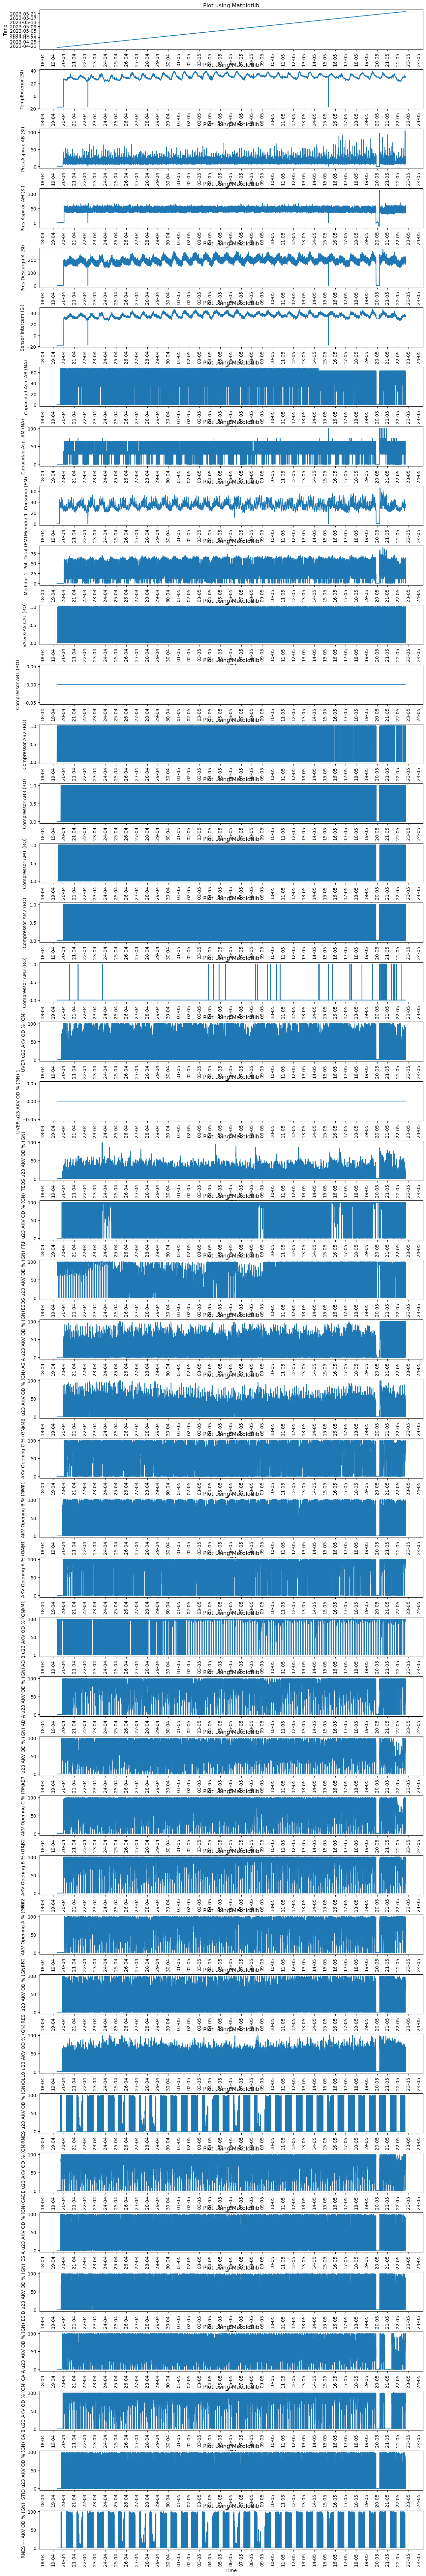

In [361]:

fig = create_plot(df)

# You can save the plot to a file if desired
#fig.savefig('plot.png')

# Show the plot
plt.show()

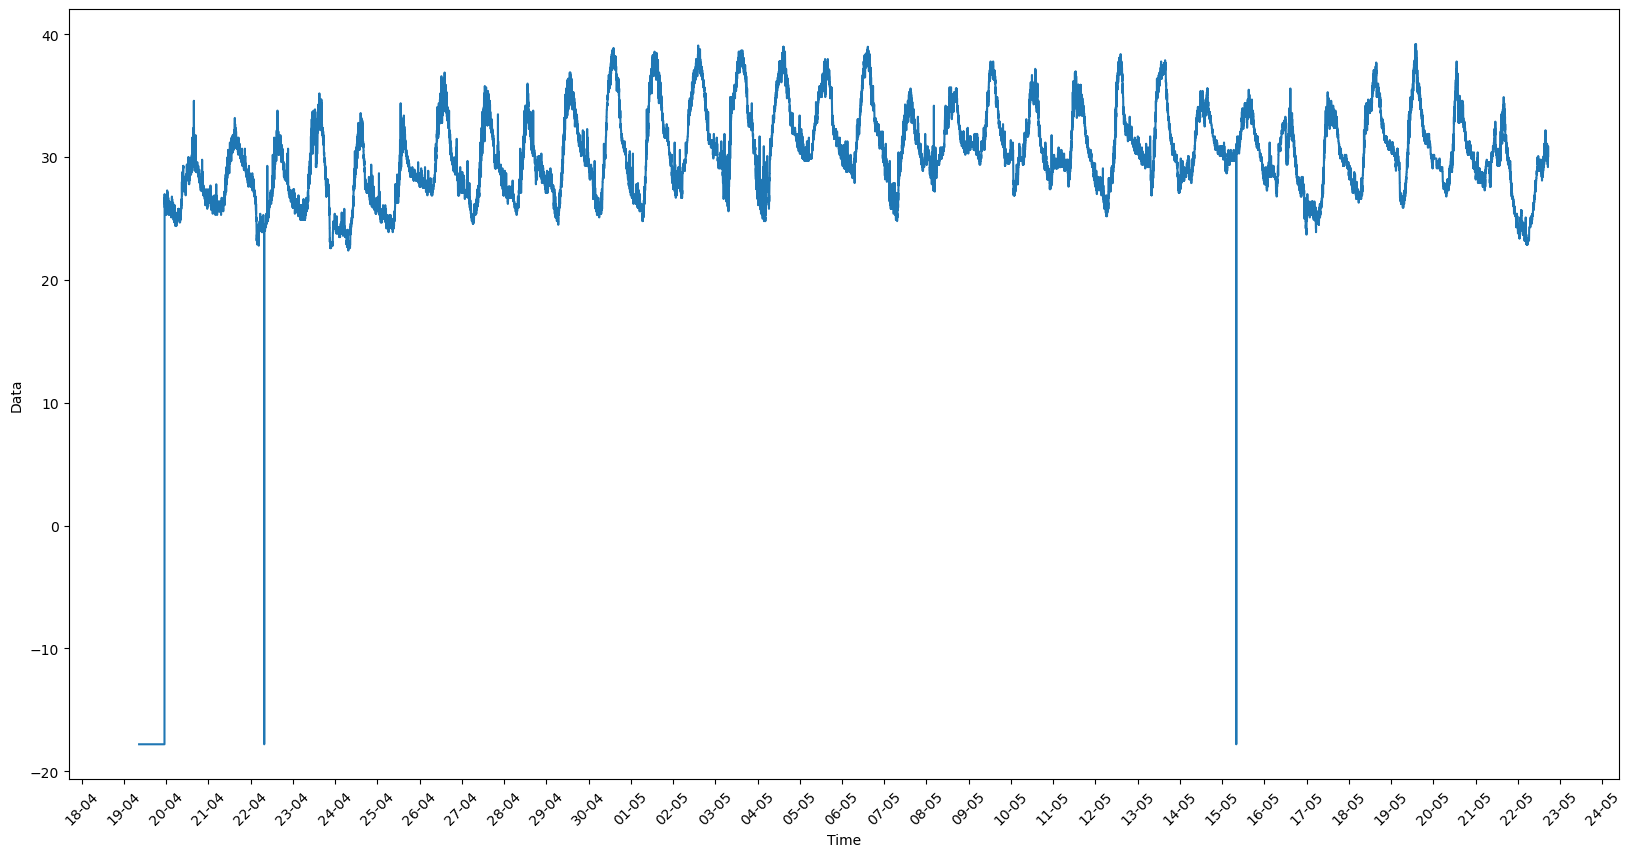

In [362]:
fig1, ax1 = plt.subplots(figsize = (20,10))
plt.setp(ax1.get_xticklabels(), rotation = 45)

ax1.plot(df['Time'], df['TempExterior (SI)'] )
ax1.set_xlabel('Time')
ax1.set_ylabel('Data')
#ax1.set_title('Plot using Matplotlib')
#ax1.tick_params(axis='x', rotation=90)

# X-axis tick formatter and interval configuration
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m'))
ax1.xaxis.set_major_locator(mdates.DayLocator(interval=1))


In [363]:

#plt.setp(ax1.get_xticklabels(), rotation = 'vertical' )
#ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d/%m/%Y'))  
#Create the second y-axis
#ax2 = ax1.twinx()
#Plot the second column on the right y-axis
#ax2.set_ylabel('Temp Sensor', color='blue')
# Display the plot


#fig, ax1 = df.plot(subplots = True, figsize = (10, 15))
#fig, ax1 = plt.subplots( figsize = (10, 15), subplots = True )


#df.plot.line(ax = ax1)
# Plot the first column on the left y-axis
#ax1.plot(1, 1)
#ax1.plot(df['Sensor Intercam (SI)'], color='blue')

6. Se renombran cada una de las columnas para mejor lectura y manejo de la información, y se elimina la columna _Energy_, ya que
ha cumplido su función al comprobarse que los máximos de energy son coincidentes con los máximos de _Power_

In [364]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48039 entries, 0 to 48038
Data columns (total 43 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Time                        48039 non-null  datetime64[ns]
 1   TempExterior (SI)           48039 non-null  float64       
 2   Pres.Aspirac AB (SI)        48039 non-null  float64       
 3   Pres.Aspirac AM (SI)        48039 non-null  float64       
 4   Pres Descarga A (SI)        48039 non-null  float64       
 5   Sensor Intercam (SI)        48039 non-null  float64       
 6   Capacidad Asp. AB (NA)      48039 non-null  float64       
 7   Capacidad Asp. AM (NA)      48039 non-null  float64       
 8   Medidor 1  Consumo (EM)     48039 non-null  float64       
 9   Medidor 1  Pot. Total (EM)  48039 non-null  float64       
 10  VALV GAS CAL (RO)           48039 non-null  float64       
 11  Compressor AB1 (RO)         48039 non-null  float64   

In [365]:
df.columns = ['Time', 'Tamb', 'Ps_BT', 'Ps_MT', 'Pd', 'Tsc', 'Cap_BT', 'Cap_MT', 'Power', 'Energy', 'Val_GC',
                'Comp_BT1', 'Comp_BT2', 'Comp_BT3', 'Comp_MT1', 'Comp_MT2', 'Comp_MT3', 'V_FRUVER1', 
                'V_FRUVER2', 'V_LACTEOS', 'V_FRI', 'V_QUESOS', 'AS A', 'V_AM6', 'V_AM1_C',
                'V_AM1_B', 'V_AM1_A', 'V_HELADOS_B', 'V_HELADOS_A', 'V_AB7', 'V_AB2_C', 'V_AB2_B', 'V_AB2_A',
                'V_RES', 'V_POLLO', 'V_CARNES', 'V_PESCADERIA', 'V_CARNES_A', 'V_CARNES_B', 'V_PESCADOS_A',
                'V_PESCADOS_B', 'V_ASISTIDAS', 'V_CARNES_2']
#df = df.drop('Energy', axis = 1)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48039 entries, 0 to 48038
Data columns (total 43 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Time          48039 non-null  datetime64[ns]
 1   Tamb          48039 non-null  float64       
 2   Ps_BT         48039 non-null  float64       
 3   Ps_MT         48039 non-null  float64       
 4   Pd            48039 non-null  float64       
 5   Tsc           48039 non-null  float64       
 6   Cap_BT        48039 non-null  float64       
 7   Cap_MT        48039 non-null  float64       
 8   Power         48039 non-null  float64       
 9   Energy        48039 non-null  float64       
 10  Val_GC        48039 non-null  float64       
 11  Comp_BT1      48039 non-null  float64       
 12  Comp_BT2      48039 non-null  float64       
 13  Comp_BT3      48039 non-null  float64       
 14  Comp_MT1      48039 non-null  float64       
 15  Comp_MT2      48039 non-null  float6

### _3.B LIMPIEZA DE LOS DATOS_ ###

7. Se decide eliminar todos los valores de presiones y/o temperaturas iguales o menores a $0$, ya que no tienen sentido
en este tipo de sistema, se opta por la eliminación en lugar de la imputación debido a que son muy pocos datos faltantes y ya
hay una buena cantidad de datos que representan completamente el comportamiento periodico de estos.

In [366]:
df = df.drop( df[ (df['Tamb'] <= 0) | (df['Tsc'] <= 0) | (df['Ps_BT'] <= 0) 
                | (df['Ps_MT'] <= 0) ].index )
"""df3 = df.drop( df[ df['Sensor Intercam (SI)'] <= 0 ].index )
df3 = df.drop( df[ df['Sensor Intercam (SI)'] <= 0 ].index ) """
#df3 = df[ (df['Tamb'] > 0) | (df['Tsc'] > 0) | (df['Ps_BT'] > 0) | (df['Ps_MT']  > 0) ]
print(df.shape)
print(df.head(10))

(46545, 43)
                   Time  Tamb  Ps_BT  Ps_MT     Pd   Tsc  Cap_BT  Cap_MT  \
974 2023-04-20 00:52:00  26.2   10.2   59.2  155.6  30.7    33.3    28.2   
975 2023-04-20 00:53:00  26.4   15.0   41.4  184.3  30.7    33.3    28.2   
976 2023-04-20 00:54:00  26.4   12.7   40.3  177.8  31.1    33.3    35.9   
977 2023-04-20 00:55:00  26.2   12.1   54.6  152.6  31.1    33.3    35.9   
978 2023-04-20 00:56:00  26.4    7.8   42.4  175.5  31.1    33.3    28.2   
979 2023-04-20 00:57:00  26.4   12.4   49.9  183.6  31.1    33.3    28.2   
980 2023-04-20 00:58:00  25.9   23.4   46.6  174.3  31.3    33.3    35.9   
981 2023-04-20 00:59:00  25.9   12.2   48.0  180.3  31.7    33.3    35.9   
982 2023-04-20 01:00:00  25.6   11.4   46.6  180.3  32.0    66.7    35.9   
983 2023-04-20 01:01:00  25.6   11.4   44.1  179.6  32.0    66.7    35.9   

     Power  Energy  ...  V_RES  V_POLLO  V_CARNES  V_PESCADERIA  V_CARNES_A  \
974   24.8    11.1  ...    0.0      0.0       0.0          96.0         

8. Se grafica nuevamente el conjunto de datos luego de su depuración.

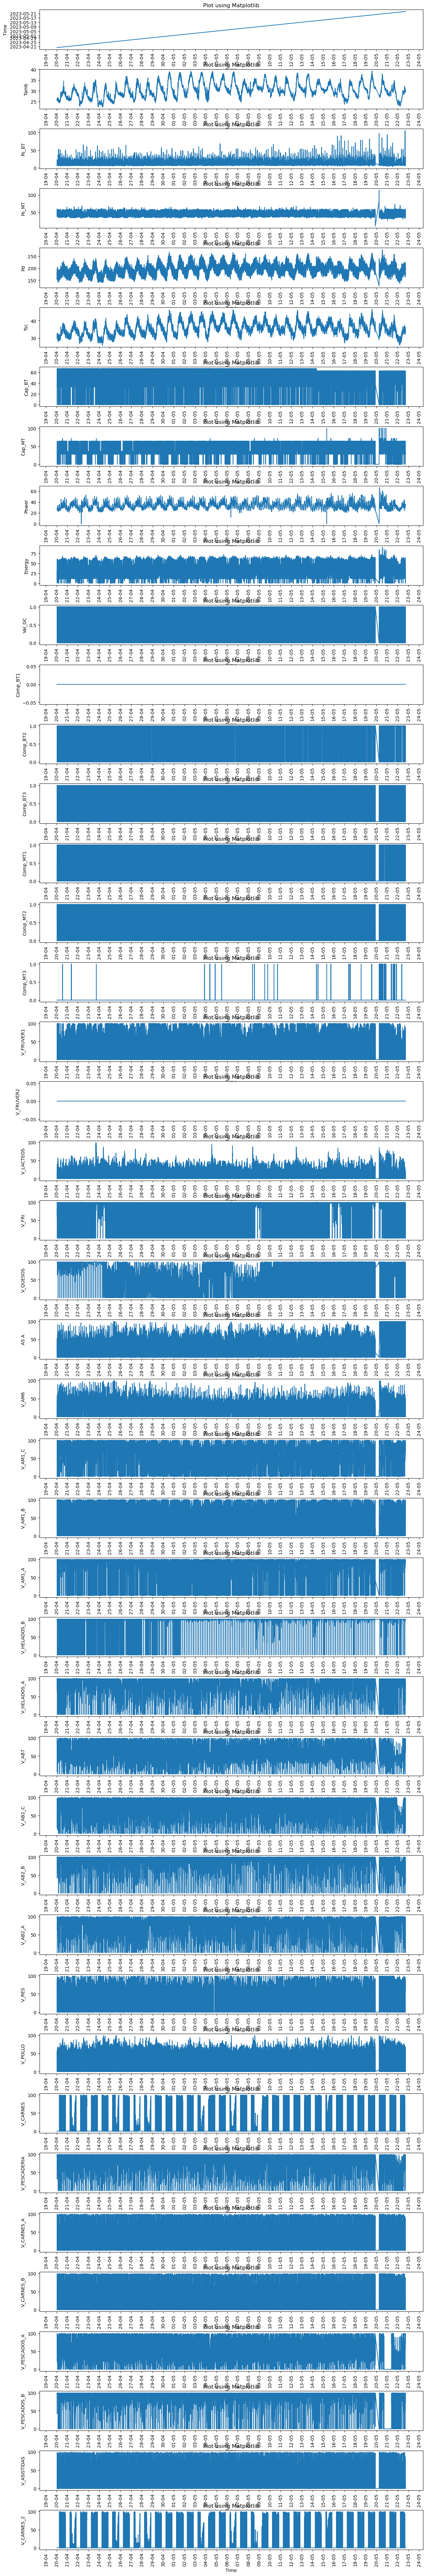

In [367]:
#df.plot.line(subplots = True, figsize = (10, 15))
fig2 = create_plot(df)

# You can save the plot to a file if desired
#fig.savefig('plot.png')

# Show the plot
plt.show()

9. Se verifica que ahora los estadísticos son coherentes y representan de manera acertada al conjunto de datos.

<Axes: xlabel='Time'>

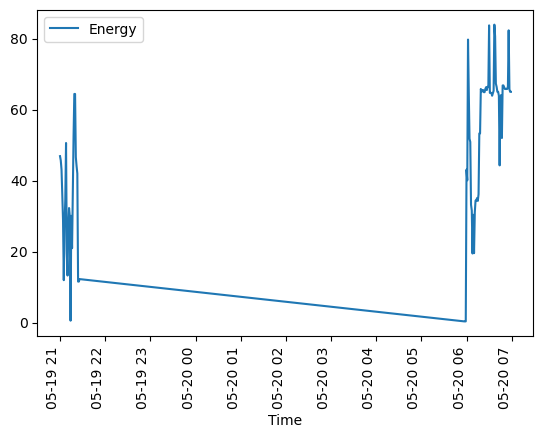

In [368]:
temp_df = df.loc[(df['Time'] >= "2023-05-19 21:00:00") 
       & (df['Time'] < "2023-05-20 07:00:00"), ['Time', 'Energy']]

temp_df.plot('Time', 'Energy', rot = 90)

In [369]:
df.drop( df[ (df['Time'] >= "2023-05-19 21:00:00") & 
        (df['Time'] < "2023-05-20 07:00:00") ].index, inplace = True )


df = df.reset_index( drop = True)

In [370]:
print(df.describe())

               Tamb         Ps_BT         Ps_MT            Pd           Tsc  \
count  46455.000000  46455.000000  46455.000000  46455.000000  46455.000000   
mean      30.241503     13.386154     43.313301    194.536151     35.436844   
std        3.426251      5.384643      4.486955     20.314515      3.607006   
min       22.400000      3.600000     26.600000    135.900000     25.900000   
25%       27.800000     10.300000     40.500000    179.900000     32.700000   
50%       29.900000     12.000000     42.600000    193.300000     35.200000   
75%       32.600000     14.600000     45.000000    208.500000     38.100000   
max       39.200000    105.000000     73.500000    277.500000     46.600000   

             Cap_BT        Cap_MT         Power        Energy        Val_GC  \
count  46455.000000  46455.000000  46455.000000  46455.000000  46455.000000   
mean      43.658489     37.585405     34.677208     34.666660      0.598020   
std       20.404874     13.652685      6.933254    

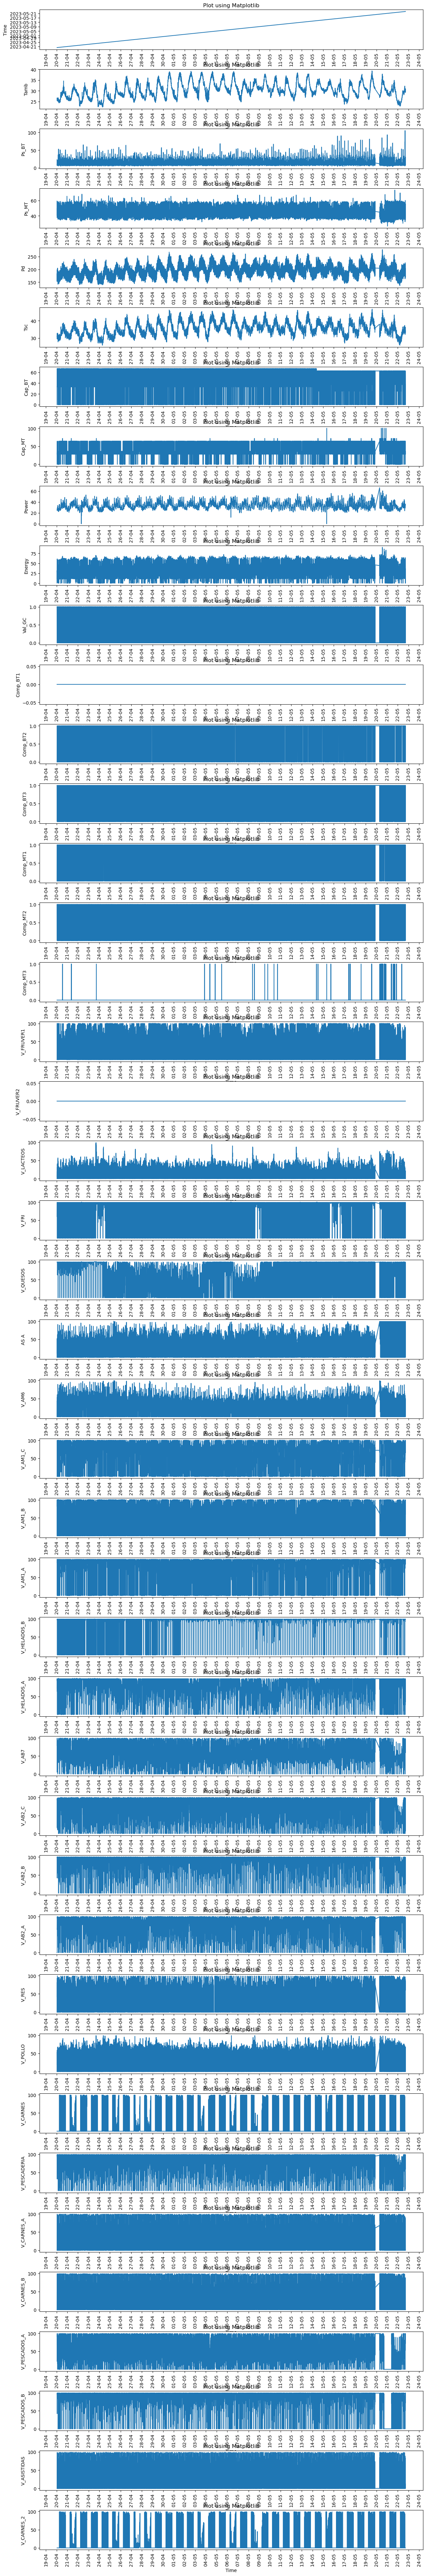

In [371]:
#df.plot.line(subplots = True, figsize = (10, 15))
fig3 = create_plot(df)

# You can save the plot to a file if desired
#fig.savefig('plot.png')

# Show the plot
plt.show()

10. Se generan los histogramas para verificar si existe una distribución normal para cada una de las variables, analizar
gráficamente la dispersión de los datos en cada caso y comprobar el skew.

array([[<Axes: title={'center': 'Time'}>,
        <Axes: title={'center': 'Tamb'}>,
        <Axes: title={'center': 'Ps_BT'}>,
        <Axes: title={'center': 'Ps_MT'}>,
        <Axes: title={'center': 'Pd'}>, <Axes: title={'center': 'Tsc'}>,
        <Axes: title={'center': 'Cap_BT'}>],
       [<Axes: title={'center': 'Cap_MT'}>,
        <Axes: title={'center': 'Power'}>,
        <Axes: title={'center': 'Energy'}>,
        <Axes: title={'center': 'Val_GC'}>,
        <Axes: title={'center': 'Comp_BT1'}>,
        <Axes: title={'center': 'Comp_BT2'}>,
        <Axes: title={'center': 'Comp_BT3'}>],
       [<Axes: title={'center': 'Comp_MT1'}>,
        <Axes: title={'center': 'Comp_MT2'}>,
        <Axes: title={'center': 'Comp_MT3'}>,
        <Axes: title={'center': 'V_FRUVER1'}>,
        <Axes: title={'center': 'V_FRUVER2'}>,
        <Axes: title={'center': 'V_LACTEOS'}>,
        <Axes: title={'center': 'V_FRI'}>],
       [<Axes: title={'center': 'V_QUESOS'}>,
        <Axes: title={'center

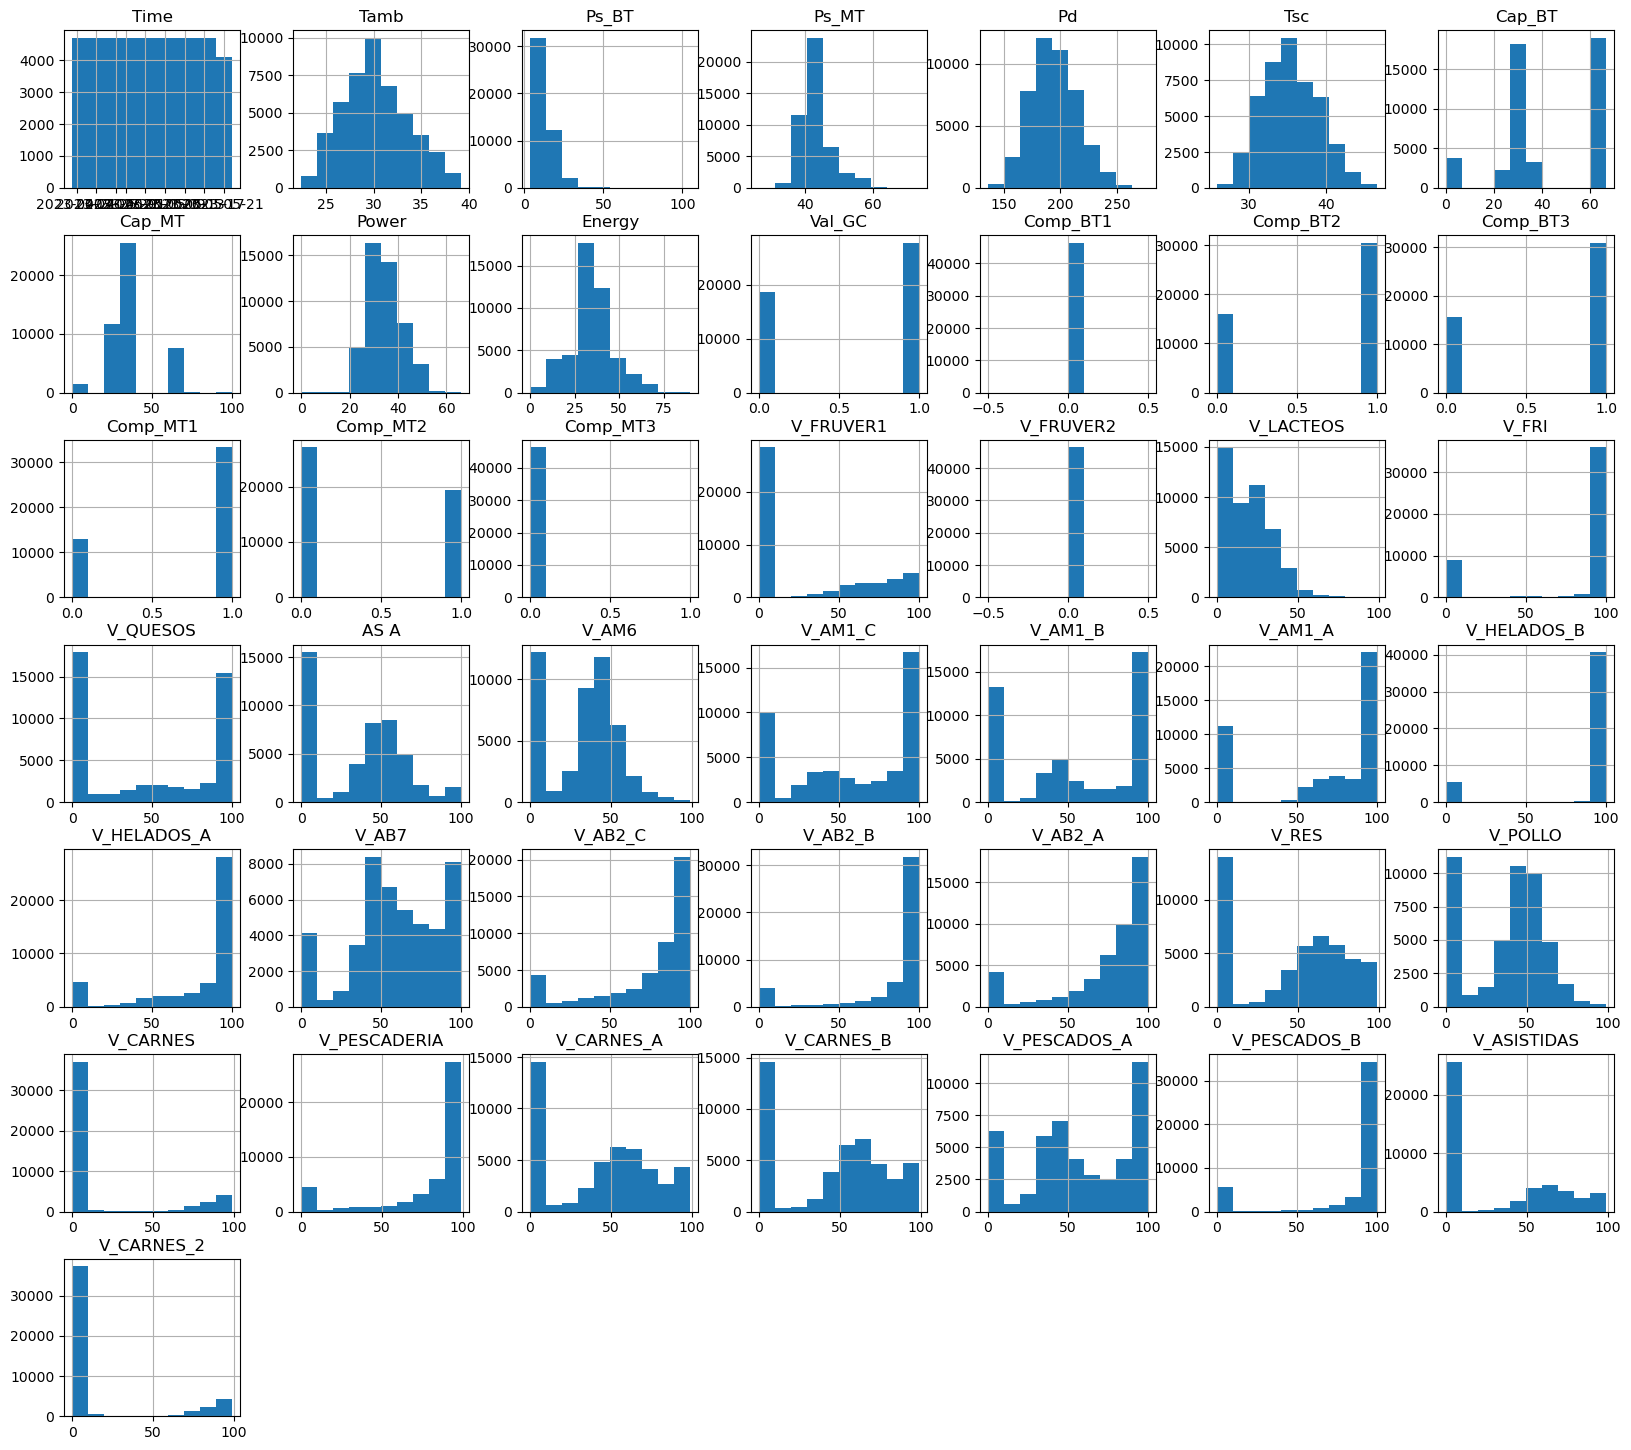

In [372]:
df.hist( figsize = (20, 18) )

11. Las cajas de Bigote permiten observar problemas principalmente en el control de la presión de BT (Congelación) y la presión de
descarga $P_{d}$, así como se evidencia que para la potencia hay una dispersión mas alta en los datos del tercer cuartil que en los del
segundo, lo cual comprueba el efecto de ajustes previos al sistema en busca de mantenerlo en los valores más bajos de potencia.

<Axes: >

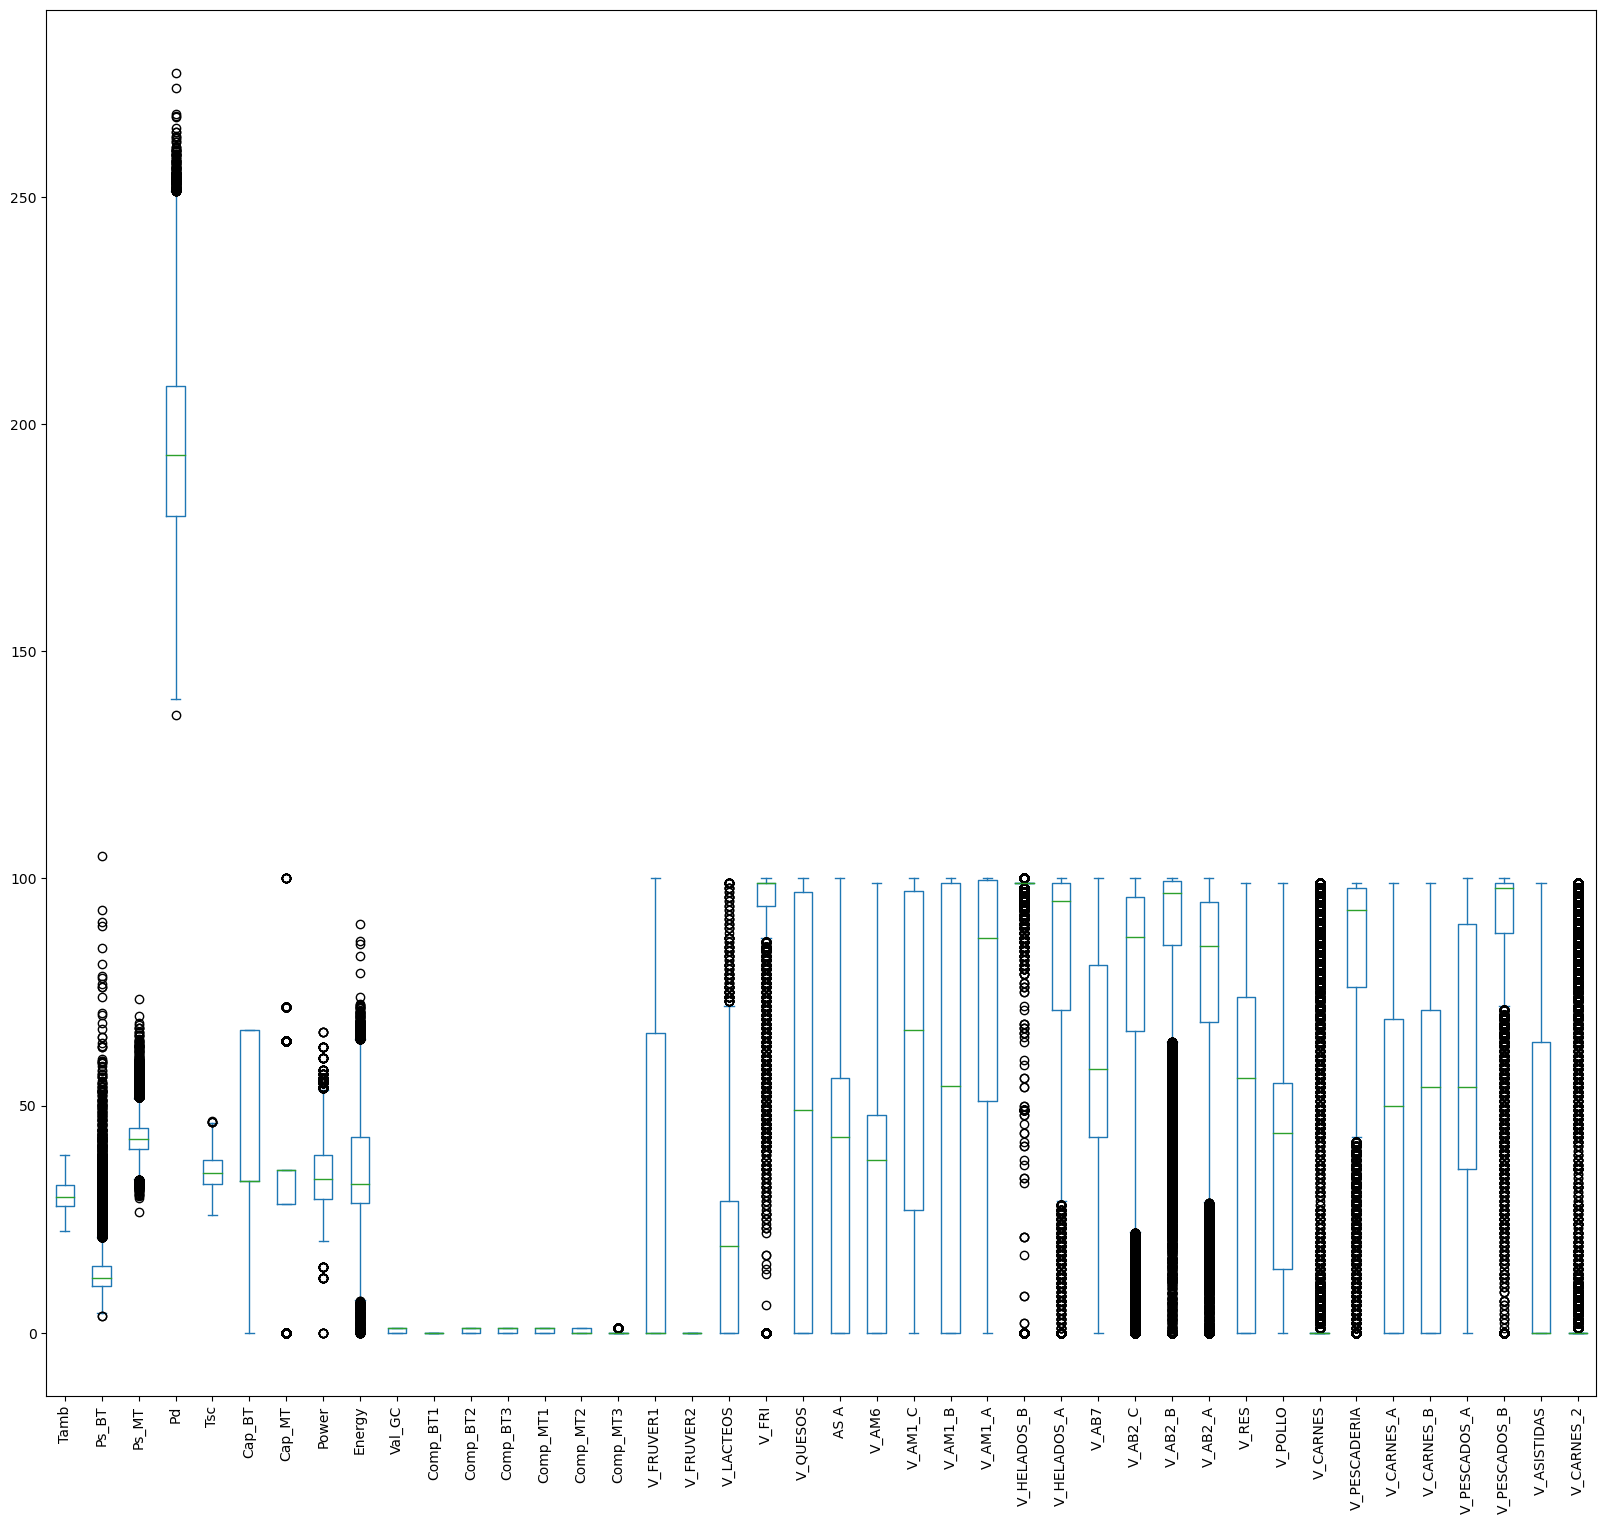

In [373]:
df.plot.box( figsize = (20, 18), rot = 90 )

12. Se comprueba que el sistema logra mantener cierta estabilidad en dos de potencia sin importar la variación de temperatura.

<Axes: xlabel='Tamb', ylabel='Energy'>

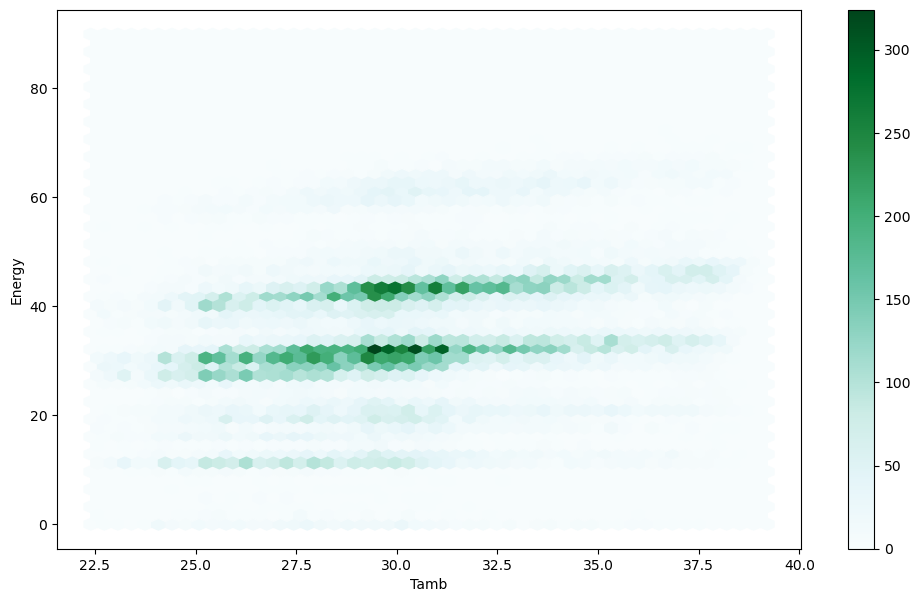

In [374]:
df.plot.hexbin('Tamb', 'Energy', figsize = (12, 7), gridsize = 50 )

13. Se demuestra el efecto de la presión de descarga sobre la temperatura de salida del intercambiador, aún con este elemento de mejora de subcooling, este no logra ser controlado cuando la presión de descarga aumenta.

<Axes: xlabel='Pd', ylabel='Tsc'>

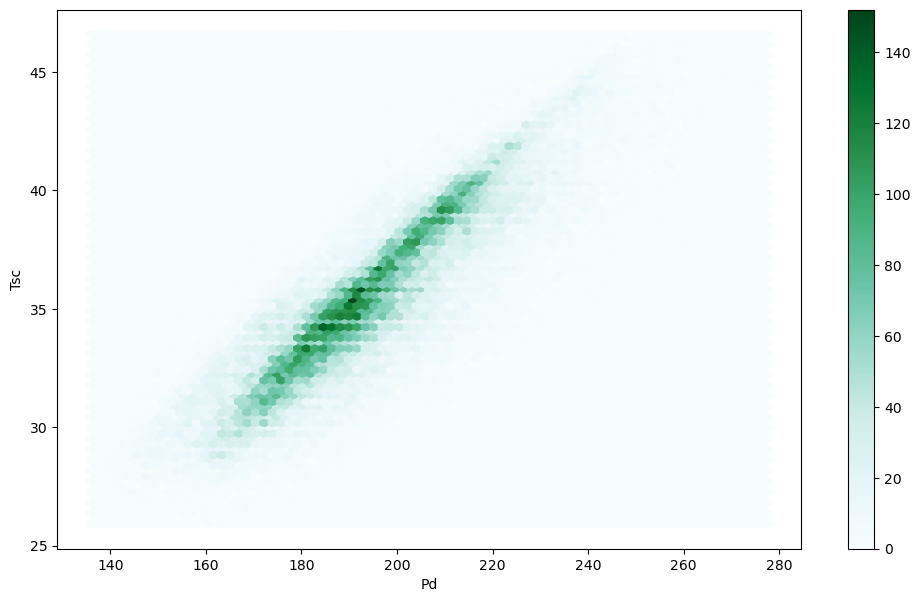

In [375]:
df.plot.hexbin('Pd', 'Tsc', figsize = (12, 7), gridsize = 80 )

In [376]:
df.skew(axis = 0, skipna = True, numeric_only = True)

Tamb             0.279296
Ps_BT            2.988894
Ps_MT            1.216831
Pd               0.255412
Tsc              0.237953
Cap_BT          -0.370431
Cap_MT           0.536099
Power            0.465953
Energy           0.036058
Val_GC          -0.399850
Comp_BT1         0.000000
Comp_BT2        -0.661885
Comp_BT3        -0.706616
Comp_MT1        -0.972799
Comp_MT2         0.338095
Comp_MT3        19.682625
V_FRUVER1        0.739837
V_FRUVER2        0.000000
V_LACTEOS        0.590311
V_FRI           -1.508640
V_QUESOS         0.015990
AS A             0.035587
V_AM6           -0.226463
V_AM1_C         -0.395389
V_AM1_B         -0.226664
V_AM1_A         -0.895034
V_HELADOS_B     -2.358774
V_HELADOS_A     -1.610373
V_AB7           -0.457983
V_AB2_C         -1.455658
V_AB2_B         -2.138527
V_AB2_A         -1.582797
V_RES           -0.293282
V_POLLO         -0.426400
V_CARNES         1.663317
V_PESCADERIA    -1.757783
V_CARNES_A      -0.086838
V_CARNES_B      -0.203571
V_PESCADOS_A

### _3.C PARTICIÓN DE LOS DATOS_ ###

## 4. MODELAMIENTO: ##

### _4.A SELECCIÓN DEL MODELO APROPIADO_ ###

1. Se divide el conjunto de datos en X, y.

In [377]:
#X = df.loc[:, df.columns != ['Power', 'Time'] ]
X = df[ df.columns.difference(['Energy', 'Power']) ]
y = df.loc[:, 'Energy']
print(X.shape, y.shape)
print(X.head(5))

(46455, 41) (46455,)
   AS A  Cap_BT  Cap_MT  Comp_BT1  Comp_BT2  Comp_BT3  Comp_MT1  Comp_MT2  \
0   0.0    33.3    28.2       0.0       0.0       1.0       0.0       1.0   
1  41.0    33.3    28.2       0.0       0.0       1.0       1.0       0.0   
2  51.0    33.3    35.9       0.0       0.0       1.0       1.0       0.0   
3  49.0    33.3    35.9       0.0       0.0       0.0       0.0       1.0   
4  45.0    33.3    28.2       0.0       0.0       1.0       0.0       1.0   

   Comp_MT3     Pd  ...  V_HELADOS_A  V_HELADOS_B  V_LACTEOS V_PESCADERIA  \
0       0.0  155.6  ...         98.0         99.0        0.0         96.0   
1       0.0  184.3  ...         93.0         99.0       18.0         97.0   
2       0.0  177.8  ...         99.0         99.0       20.0         98.0   
3       0.0  152.6  ...         99.0         99.0        9.0         99.0   
4       0.0  175.5  ...         99.0         99.0       20.0         92.0   

   V_PESCADOS_A  V_PESCADOS_B  V_POLLO  V_QUESOS  V_R

2. Se realiza la estandarización de los datos haciendo uso de MinMax Scaler y se revisa la salida obtenida.

In [378]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

scaler = MinMaxScaler( feature_range = (0, 1) )
X_scaled = scaler.fit_transform( X.loc[:, X.columns != 'Time'] )
print(X_scaled[0,:])
print(y.shape)
print(X_scaled[0,0])

[0.         0.49925037 0.282      0.         0.         1.
 0.         1.         0.         0.13912429 0.06508876 0.69509595
 0.22619048 0.23188406 0.         0.985      0.937      0.79
 0.91       0.823      0.         0.         0.         0.
 0.         0.         0.         0.6        0.         0.
 0.98       0.99       0.         0.96969697 0.91       0.96
 0.         0.99       0.         1.        ]
(46455,)
0.0


3. Se parten los datos en entrenamiento y prueba con una partición de $70\%$, $30\%$ respectivamente, se obtienen particiones para los 
datos escalados y sin escalar.

In [379]:
X_train_M = X.loc[ (df['Time'] >= "2023-04-19 08:30:00") &
                    (df['Time'] < "2023-04-26 00:00:00"), X.columns != 'Time']

X_test_M = X.loc[ (df['Time'] >= "2023-04-26 00:00:00") &
                    (df['Time'] < "2023-04-28 00:00:00"), X.columns != 'Time' ]

X_valid_M = X.loc[ (df['Time'] >= "2023-04-28 00:00:00") &
                    (df['Time'] < "2023-05-01 10:00:00"), X.columns != 'Time' ]

X_train_Msc = scaler.fit_transform( X_train_M )
X_test_Msc = scaler.fit_transform( X_test_M )
X_valid_Msc = scaler.fit_transform( X_valid_M )


y_train_M = y.loc[ (df['Time'] >= "2023-04-19 08:30:00") &
                    (df['Time'] < "2023-04-26 00:00:00") ]

y_test_M = y.loc[ (df['Time'] >= "2023-04-26 00:00:00") &
                    (df['Time'] < "2023-04-28 00:00:00") ]

y_valid_M = y.loc[ (df['Time'] >= "2023-04-28 00:00:00") &
                    (df['Time'] < "2023-05-01 10:00:00") ]

print(y_valid_M.head(-5))

11462    58.2
11463    32.2
11464    47.7
11465    40.5
11466    31.1
         ... 
16372    39.5
16373    43.4
16374    43.4
16375    44.4
16376    43.8
Name: Energy, Length: 4915, dtype: float64


In [380]:

X_train_sc, X_test_sc, y_train_sc, y_test_sc = train_test_split(X_scaled, y, 
                                                    random_state=12, test_size=0.3)

X_train, X_test, y_train, y_test = train_test_split(X.loc[:, X.columns != 'Time'], y, 
                                                    random_state=12, test_size=0.3)

In [381]:
X_train = X_train_Msc
X_test = X_test_Msc
X_valid = X_valid_Msc

y_train = y_train_M
y_test = y_test_M
y_valid = y_valid_M


4. En la búsqueda de modelos apropiados para el sistema se encuentran 3 opciones:

-_Regresión con vecinos más cercanos:_ Modelo sencillo que puede entregar resultados rápidos, por la naturaleza periódica de
los datos permitia inferir que lograría buenos resultados.  
  
-_Regresión con RandomForest:_ Se deciden emplear múltiples arboles de decisión, entendiendo que por la descripción de las variables
unas variables aportarían mucho más en peso que otras a la constitución de los valores de energía, se decide probar este método basado
en teoría de la información.  
  
-_Regresión con Redes Neuronales:_ Debido a que se tenía una cantidad de datos importante para trabajar, se decide probar este método
dada su capacidad de entregar buenos resultados para grandes volumenes de datos.

In [382]:
model = KNeighborsRegressor(n_neighbors = 5, weights = 'distance')
model.fit(X_train, y_train)
y_pred_KN = model.predict(X_test)

Se hace una prueba inicial del método de vécinos más cercanos y se obtiene un resultado con una correlación clara entre los datos
de prueba y los predichos, en este caso se decide usar el MSE y se obtiene un MSE  de 4.7.

2880
6.644372877683519


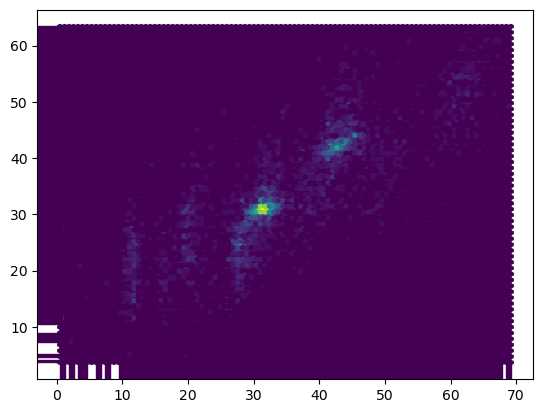

In [383]:
from sklearn.metrics import mean_squared_error

print(y_pred_KN.size)
print( np.sqrt(mean_squared_error(y_test, y_pred_KN)) )
plt.hexbin(y_test, y_pred_KN, gridsize = 100, marginals = True)


### _4.B, 4.C DISEÑO EXPERIMENTACIÓN Y ENTRENAMIENTO DE MODELOS_ ###

5. Se crea un pipeline para encapsular todo el proceso de modelamiento, entrenamiento, selección de hiperparámetros y validación cruzada.
   Se inicia con el método de vecinos más cercanos buscando los mejores valores para los siguientes hiperparámetros:
  
  - _n_neighbors:_ Validación del mejor número de vecinos entre 2 y 20 con salto de 2.
  - _weights:_ Validación del mejor peso entre uniforme y distancia.

In [384]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

pipeline_1 = Pipeline([
    ('KN', KNeighborsRegressor())
])

parameters_1 = {
    'KN__n_neighbors' : [i for i in range(2, 20, 2) ],
    'KN__weights'     : ['uniform', 'distance']
}

grid_search_1 = GridSearchCV(pipeline_1, parameters_1, cv=3,
                            verbose = 3)

In [385]:
grid_search_1.fit(X_train, y_train)

Fitting 3 folds for each of 18 candidates, totalling 54 fits
[CV 1/3] END KN__n_neighbors=2, KN__weights=uniform;, score=0.657 total time=   0.0s
[CV 2/3] END KN__n_neighbors=2, KN__weights=uniform;, score=0.670 total time=   0.0s
[CV 3/3] END KN__n_neighbors=2, KN__weights=uniform;, score=0.655 total time=   0.0s
[CV 1/3] END KN__n_neighbors=2, KN__weights=distance;, score=0.660 total time=   0.0s
[CV 2/3] END KN__n_neighbors=2, KN__weights=distance;, score=0.672 total time=   0.0s
[CV 3/3] END KN__n_neighbors=2, KN__weights=distance;, score=0.656 total time=   0.0s
[CV 1/3] END KN__n_neighbors=4, KN__weights=uniform;, score=0.710 total time=   0.0s
[CV 2/3] END KN__n_neighbors=4, KN__weights=uniform;, score=0.713 total time=   0.0s
[CV 3/3] END KN__n_neighbors=4, KN__weights=uniform;, score=0.708 total time=   0.0s
[CV 1/3] END KN__n_neighbors=4, KN__weights=distance;, score=0.712 total time=   0.0s
[CV 2/3] END KN__n_neighbors=4, KN__weights=distance;, score=0.716 total time=   0.0s

GridSearchCV(cv=3, estimator=Pipeline(steps=[('KN', KNeighborsRegressor())]),
             param_grid={'KN__n_neighbors': [2, 4, 6, 8, 10, 12, 14, 16, 18],
                         'KN__weights': ['uniform', 'distance']},
             verbose=3)

Se observa una correlación mayor al 84%, lo cual indica que hay un buen comportamiento del modelo, esto se corrbora con la gráfica de correlación.

In [386]:
print(f"Mejor puntuación: {grid_search_1.best_score_}")
print("Mejor valores parámetros:")

best_parameters_1 = grid_search_1.best_params_
for param in sorted(parameters_1.keys()):
    print(f"\t{param}: {best_parameters_1[param]}")

Mejor puntuación: 0.7274690398613014
Mejor valores parámetros:
	KN__n_neighbors: 10
	KN__weights: distance


6.479430839469422


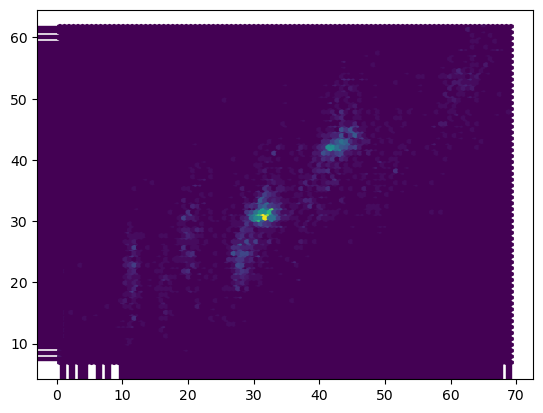

In [387]:
y_pred_1 = grid_search_1.predict(X_test)
print( np.sqrt(mean_squared_error(y_test, y_pred_1)) )
plt.hexbin(y_test, y_pred_1, gridsize = 100, marginals = True)

6. Se crea un nuevo pipeline para la evaluación de random forest buscando ajustar los siguientes hiperparámetros:

-_n_estimators:_  se prueban varias cantidades de arboles.

-_max_features:_ Se ajusta el porcentaje de características a tomar en cada split.

In [388]:
from sklearn.ensemble import RandomForestRegressor

pipeline_2 = Pipeline([
    ('RF', RandomForestRegressor())
])

parameters_2 = {
    'RF__n_estimators' : [i for i in range(2, 20, 2) ],
    'RF__max_features' : [i/5 for i in range(2, 5, 1) ]
}

grid_search_2 = GridSearchCV(pipeline_2, parameters_2, cv=3,
                            verbose = 3)

grid_search_2.fit(X_train, y_train)



Fitting 3 folds for each of 27 candidates, totalling 81 fits
[CV 1/3] END RF__max_features=0.4, RF__n_estimators=2;, score=0.826 total time=   0.0s
[CV 2/3] END RF__max_features=0.4, RF__n_estimators=2;, score=0.835 total time=   0.0s
[CV 3/3] END RF__max_features=0.4, RF__n_estimators=2;, score=0.807 total time=   0.0s
[CV 1/3] END RF__max_features=0.4, RF__n_estimators=4;, score=0.878 total time=   0.1s
[CV 2/3] END RF__max_features=0.4, RF__n_estimators=4;, score=0.868 total time=   0.1s
[CV 3/3] END RF__max_features=0.4, RF__n_estimators=4;, score=0.867 total time=   0.1s
[CV 1/3] END RF__max_features=0.4, RF__n_estimators=6;, score=0.879 total time=   0.1s
[CV 2/3] END RF__max_features=0.4, RF__n_estimators=6;, score=0.886 total time=   0.2s
[CV 3/3] END RF__max_features=0.4, RF__n_estimators=6;, score=0.887 total time=   0.1s
[CV 1/3] END RF__max_features=0.4, RF__n_estimators=8;, score=0.896 total time=   0.2s
[CV 2/3] END RF__max_features=0.4, RF__n_estimators=8;, score=0.903 t

GridSearchCV(cv=3, estimator=Pipeline(steps=[('RF', RandomForestRegressor())]),
             param_grid={'RF__max_features': [0.4, 0.6, 0.8],
                         'RF__n_estimators': [2, 4, 6, 8, 10, 12, 14, 16, 18]},
             verbose=3)

El modelo ya ha superado la correlación del 85%, generando una leve mejoría respecto al modelo de vecinos más cercanos, esto se ha
logrado haciendo uso de 16 árboles y tomando el 60% de las características en cada split.

In [389]:
print(f"Mejor puntuación: {grid_search_2.best_score_}")
print("Mejor valores parámetros:")

best_parameters_2 = grid_search_2.best_params_
for param in sorted(parameters_2.keys()):
    print(f"\t{param}: {best_parameters_2[param]}")

Mejor puntuación: 0.9108792083415741
Mejor valores parámetros:
	RF__max_features: 0.8
	RF__n_estimators: 18


EL MSE en los datos de prueba demuestra que en efecto este modelo presenta un mejor comportamiento respecto a posibles errores grandes que el modelo de vecinos más cercanos.

3.535998452101944


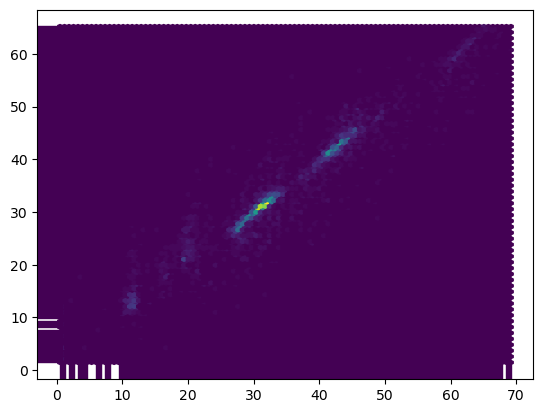

In [390]:
y_pred_2 = grid_search_2.predict(X_test)
print( np.sqrt(mean_squared_error(y_test, y_pred_2)) )
plt.hexbin(y_test, y_pred_2, gridsize = 100, marginals = True )

7. Por último se desarrolla el pipeline para redes neuronales, en este caso se evaluaron múltiples hiperparámetros:  

    El objetivo era encontrar el solver y los métodos de activación más adecuados para este sistema, se encuentra que el solver _Adam_ funciona muy bien para este caso, en cambio, _sgd_ lo hace de forma bastante regular

In [391]:
from sklearn.neural_network import MLPRegressor

pipeline_3 = Pipeline([
    ('MLP', MLPRegressor())
])

parameters_3 = {
    'MLP__hidden_layer_sizes' : [60, 90, 120 ],
    'MLP__activation' : [ 'logistic', 'relu' ],
    'MLP__solver' : [ 'adam' ],
    'MLP__max_iter' : [ 200 ],
    'MLP__random_state' : [ 1 ]
}

grid_search_3 = GridSearchCV(pipeline_3, parameters_3, cv=3,
                            verbose = 3)

grid_search_3.fit(X_train, y_train)



Fitting 3 folds for each of 6 candidates, totalling 18 fits


c:\ProgramData\anaconda3\envs\mlds_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\ProgramData\anaconda3\envs\mlds_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:693: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


[CV 1/3] END MLP__activation=logistic, MLP__hidden_layer_sizes=60, MLP__max_iter=200, MLP__random_state=1, MLP__solver=adam;, score=0.881 total time=   3.7s
[CV 2/3] END MLP__activation=logistic, MLP__hidden_layer_sizes=60, MLP__max_iter=200, MLP__random_state=1, MLP__solver=adam;, score=-4.123 total time=   0.0s


c:\ProgramData\anaconda3\envs\mlds_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END MLP__activation=logistic, MLP__hidden_layer_sizes=60, MLP__max_iter=200, MLP__random_state=1, MLP__solver=adam;, score=0.887 total time=   3.6s


c:\ProgramData\anaconda3\envs\mlds_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END MLP__activation=logistic, MLP__hidden_layer_sizes=90, MLP__max_iter=200, MLP__random_state=1, MLP__solver=adam;, score=0.884 total time=   4.6s


c:\ProgramData\anaconda3\envs\mlds_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END MLP__activation=logistic, MLP__hidden_layer_sizes=90, MLP__max_iter=200, MLP__random_state=1, MLP__solver=adam;, score=0.889 total time=   4.6s


c:\ProgramData\anaconda3\envs\mlds_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END MLP__activation=logistic, MLP__hidden_layer_sizes=90, MLP__max_iter=200, MLP__random_state=1, MLP__solver=adam;, score=0.889 total time=   5.0s


c:\ProgramData\anaconda3\envs\mlds_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END MLP__activation=logistic, MLP__hidden_layer_sizes=120, MLP__max_iter=200, MLP__random_state=1, MLP__solver=adam;, score=0.886 total time=   5.2s


c:\ProgramData\anaconda3\envs\mlds_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END MLP__activation=logistic, MLP__hidden_layer_sizes=120, MLP__max_iter=200, MLP__random_state=1, MLP__solver=adam;, score=0.892 total time=   5.4s


c:\ProgramData\anaconda3\envs\mlds_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END MLP__activation=logistic, MLP__hidden_layer_sizes=120, MLP__max_iter=200, MLP__random_state=1, MLP__solver=adam;, score=0.892 total time=   5.3s


c:\ProgramData\anaconda3\envs\mlds_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END MLP__activation=relu, MLP__hidden_layer_sizes=60, MLP__max_iter=200, MLP__random_state=1, MLP__solver=adam;, score=0.908 total time=   3.1s


c:\ProgramData\anaconda3\envs\mlds_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END MLP__activation=relu, MLP__hidden_layer_sizes=60, MLP__max_iter=200, MLP__random_state=1, MLP__solver=adam;, score=0.912 total time=   3.2s


c:\ProgramData\anaconda3\envs\mlds_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END MLP__activation=relu, MLP__hidden_layer_sizes=60, MLP__max_iter=200, MLP__random_state=1, MLP__solver=adam;, score=0.911 total time=   3.2s


c:\ProgramData\anaconda3\envs\mlds_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END MLP__activation=relu, MLP__hidden_layer_sizes=90, MLP__max_iter=200, MLP__random_state=1, MLP__solver=adam;, score=0.905 total time=   3.8s


c:\ProgramData\anaconda3\envs\mlds_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END MLP__activation=relu, MLP__hidden_layer_sizes=90, MLP__max_iter=200, MLP__random_state=1, MLP__solver=adam;, score=0.909 total time=   4.0s


c:\ProgramData\anaconda3\envs\mlds_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END MLP__activation=relu, MLP__hidden_layer_sizes=90, MLP__max_iter=200, MLP__random_state=1, MLP__solver=adam;, score=0.911 total time=   3.8s


c:\ProgramData\anaconda3\envs\mlds_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END MLP__activation=relu, MLP__hidden_layer_sizes=120, MLP__max_iter=200, MLP__random_state=1, MLP__solver=adam;, score=0.909 total time=   4.4s


c:\ProgramData\anaconda3\envs\mlds_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END MLP__activation=relu, MLP__hidden_layer_sizes=120, MLP__max_iter=200, MLP__random_state=1, MLP__solver=adam;, score=0.914 total time=   4.3s


c:\ProgramData\anaconda3\envs\mlds_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END MLP__activation=relu, MLP__hidden_layer_sizes=120, MLP__max_iter=200, MLP__random_state=1, MLP__solver=adam;, score=0.913 total time=   4.4s


c:\ProgramData\anaconda3\envs\mlds_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


GridSearchCV(cv=3, estimator=Pipeline(steps=[('MLP', MLPRegressor())]),
             param_grid={'MLP__activation': ['logistic', 'relu'],
                         'MLP__hidden_layer_sizes': [60, 90, 120],
                         'MLP__max_iter': [200], 'MLP__random_state': [1],
                         'MLP__solver': ['adam']},
             verbose=3)

El modelo de redes neuronales obtiene el mejor comportamiento, sin embargo, por la cercania en los Scores, cualidades como el tiempo de ejecución y facilidad de explicación del modelo podrían hacer que randomforest sea la opción ideal como modelo definitivo.

In [392]:
print(f"Mejor puntuación: {grid_search_3.best_score_}")
print("Mejor valores parámetros:")

best_parameters_3 = grid_search_3.best_params_
for param in sorted(parameters_3.keys()):
    print(f"\t{param}: {best_parameters_3[param]}")

Mejor puntuación: 0.9119622807885516
Mejor valores parámetros:
	MLP__activation: relu
	MLP__hidden_layer_sizes: 120
	MLP__max_iter: 200
	MLP__random_state: 1
	MLP__solver: adam


3.391014494968721


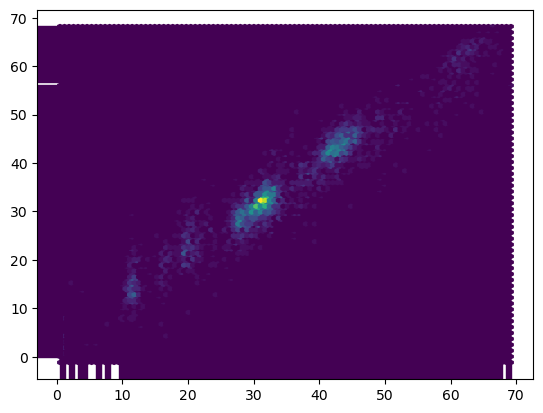

In [393]:
y_pred_3 = grid_search_3.predict(X_test)
print( np.sqrt(mean_squared_error(y_test, y_pred_3)) )
plt.hexbin(y_test, y_pred_3, gridsize = 100, marginals = True)

## CONCLUSIONES ##

1. El modelo seleccionado para este sistema es el randomfores con 16 árboles y 60% de características tomadas en cada split, se obtiene un score de R2 mayor al 85%.

2. Para este ejercicio no se tomaron datos que representan la carga térmica que se impone al sistema, se propone para una nueva iteración cargar otras variables como aperturas de válvulas y desarrollar un PCA para encontrar las que aportan más al comportamiento de la potencia.

3. Debido a que es posible que se hayan modificado parámetros de control en el rango de tiempo de la toma de datos, debe verificarse si esto podría alterar las predicciones que haga el modelo y si este debe ajustarse dinamicamente para permitir al usuario ajustar su sistema.

4. El preprocesamiento permitió comprender además de la importancia de cada variable al modelo, problemas y preexistencias del sistema que deben
ser corregidas para predecir luego con un sistema operando correctamente.